[[-0.20964512 -0.42985226]
 [ 0.69716855  1.59518435]
 [-0.20964512 -0.42985226]
 [ 1.15057539  1.59518435]
 [ 0.69716855 -0.42985226]
 [-0.96532319 -0.42985226]
 [-1.1164588  -0.42985226]
 [-0.36078074 -0.15984738]
 [ 0.39489733  0.92017215]
 [-0.05850951 -0.15984738]
 [-0.66305196 -0.42985226]
 [ 1.75511784 -0.42985226]
 [-0.20964512  3.62022096]
 [-0.51191635 -0.42985226]
 [-0.66305196 -0.42985226]
 [-0.36078074 -0.42985226]
 [-0.96532319 -0.42985226]
 [ 0.24376171 -0.42985226]
 [-0.66305196 -0.42985226]
 [ 0.54603294 -0.42985226]
 [-0.66305196  3.62022096]
 [-0.96532319 -0.42985226]
 [-0.20964512 -0.42985226]
 [-1.1164588  -0.42985226]
 [-0.20964512 -0.42985226]
 [-0.81418757 -0.42985226]
 [ 0.69716855  1.59518435]
 [ 0.84830416 -0.42985226]
 [ 0.39489733  3.62022096]
 [-0.81418757  3.62022096]
 [ 0.0926261   0.51516482]
 [-0.81418757 -0.42985226]
 [-0.20964512 -0.42985226]
 [-0.66305196  0.1101575 ]
 [-0.81418757  0.1101575 ]
 [-0.36078074 -0.42985226]
 [ 0.0926261  -0.42985226]
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


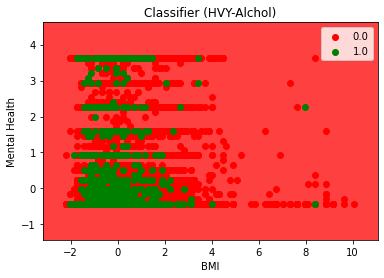

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv('C:/Users/asus/Desktop/my patents/pupil vs wmc project/diabetes_012_health_indicators_BRFSS2015.csv')
# input
dataset['Diabetes_012'].replace(to_replace = 2, value =1)

x = dataset.iloc[:,[4,15]].values


# output
y = dataset.iloc[:, 11].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.1, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

 
print (xtrain[0:100, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)
classifier.predict_proba(xtest)



y_pred = classifier.predict(xtest)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (HVY-Alchol)')
plt.xlabel('BMI')
plt.ylabel('Mental Health')
plt.legend()
plt.show()


